In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
train_data=pd.read_csv('train.csv.zip')

In [8]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test=pd.read_csv('test.csv.zip')

In [10]:
test=test.values.reshape(-1,28,28,1)

In [11]:
test=test/255

In [12]:
y=train_data['label']
X=train_data.drop('label',axis=1)

In [13]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X=X.values.reshape(-1,28,28,1)

In [15]:
# pd.isnull(X[0])

In [16]:
X.max()

255

In [17]:
single_image=X[4]

In [18]:
single_image=single_image/255

In [19]:
# single_image

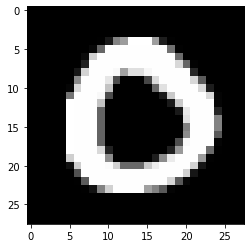

In [20]:
plt.imshow(single_image[:,:,0],cmap='gray')

In [21]:
X=X/255

In [22]:
# X

In [23]:
from keras.utils import to_categorical

Using Theano backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529

In [24]:
# y_cat=to_categorical(y,10)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [27]:
y_cat_test=to_categorical(y_test)
y_cat_train=to_categorical(y_train)

In [28]:
# import matplotlib.pyplot as plt

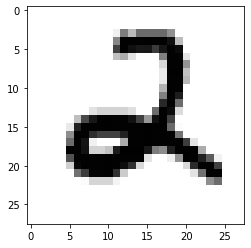

In [29]:
g = plt.imshow(X_train[0][:,:,0],cmap='gray_r')

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D

In [31]:
model=Sequential()

model.add(Conv2D(filters=32,input_shape=(28,28,1),kernel_size=(5,5),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '4713' (I am process '4235')
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_l


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_y0ltenr3


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_ot8uanrd


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_l7r25gfa


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_geo6l3o_


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_jaqn0o8x


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_js2y1npw


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_5dzmbhgr


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_ach__94e


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_haf6qkck


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_mrigqrg0


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_unru7uvi


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/opt/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1157, in __compile__
   


You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_1bdnd7v9

You can find the C code in this temporary file: /var/folders/s1/00r3hqxd29xgn06sktysppgw0000gn/T/theano_compilation_error_o72st_4m


Exception: ('The following error happened while compiling the node', Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418}), '\n', "Compilation failed (return status=1): /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:396:27: error: non-constant-expression cannot be narrowed from type 'npy_intp' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing].     int init_totals[4] = {V1_n0, V1_n1, V1_n2, V1_n3};.                           ^~~~~. /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:396:27: note: insert an explicit cast to silence this issue.     int init_totals[4] = {V1_n0, V1_n1, V1_n2, V1_n3};.                           ^~~~~.                           static_cast<int>( ). /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:396:34: error: non-constant-expression cannot be narrowed from type 'npy_intp' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing].     int init_totals[4] = {V1_n0, V1_n1, V1_n2, V1_n3};.                                  ^~~~~. /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:396:34: note: insert an explicit cast to silence this issue.     int init_totals[4] = {V1_n0, V1_n1, V1_n2, V1_n3};.                                  ^~~~~.                                  static_cast<int>( ). /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:396:41: error: non-constant-expression cannot be narrowed from type 'npy_intp' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing].     int init_totals[4] = {V1_n0, V1_n1, V1_n2, V1_n3};.                                         ^~~~~. /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:396:41: note: insert an explicit cast to silence this issue.     int init_totals[4] = {V1_n0, V1_n1, V1_n2, V1_n3};.                                         ^~~~~.                                         static_cast<int>( ). /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:396:48: error: non-constant-expression cannot be narrowed from type 'npy_intp' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing].     int init_totals[4] = {V1_n0, V1_n1, V1_n2, V1_n3};.                                                ^~~~~. /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:396:48: note: insert an explicit cast to silence this issue.     int init_totals[4] = {V1_n0, V1_n1, V1_n2, V1_n3};.                                                ^~~~~.                                                static_cast<int>( ). /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:415:1: error: non-constant-expression cannot be narrowed from type 'ssize_t' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing]. V1_stride0, V1_stride1, V1_stride2, V1_stride3. ^~~~~~~~~~. /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:415:1: note: insert an explicit cast to silence this issue. V1_stride0, V1_stride1, V1_stride2, V1_stride3. ^~~~~~~~~~. static_cast<int>( ). /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:415:13: error: non-constant-expression cannot be narrowed from type 'ssize_t' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing]. V1_stride0, V1_stride1, V1_stride2, V1_stride3.             ^~~~~~~~~~. /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:415:13: note: insert an explicit cast to silence this issue. V1_stride0, V1_stride1, V1_stride2, V1_stride3.             ^~~~~~~~~~.             static_cast<int>( ). /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:415:25: error: non-constant-expression cannot be narrowed from type 'ssize_t' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing]. V1_stride0, V1_stride1, V1_stride2, V1_stride3.                         ^~~~~~~~~~. /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:415:25: note: insert an explicit cast to silence this issue. V1_stride0, V1_stride1, V1_stride2, V1_stride3.                         ^~~~~~~~~~.                         static_cast<int>( ). /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:415:37: error: non-constant-expression cannot be narrowed from type 'ssize_t' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing]. V1_stride0, V1_stride1, V1_stride2, V1_stride3.                                     ^~~~~~~~~~. /Users/ayan/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.4-64/tmp9pyd_udz/mod.cpp:415:37: note: insert an explicit cast to silence this issue. V1_stride0, V1_stride1, V1_stride2, V1_stride3.                                     ^~~~~~~~~~.                                     static_cast<int>( ). 8 errors generated.. ", '[Elemwise{Cast{float32}}(TensorConstant{(1, 1, 1, ..8654224418})]')

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)

In [ ]:
# datagen.fit(X_train)

In [ ]:
# results = model.fit_generator((datagen.flow(X_train,y_cat_train, batch_size=16),epochs=1,
#                               steps_per_epoch=150,
#                               validation_data=(X_test,y_cat_test),
#                              validation_steps=12)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
# image_gen=ImageDataGenerator(rotation_range=30,
#                             width_shift_range=0.1,
#                             height_shift_range=0.1,
#                             rescale=1/255,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=False,
#                             vertical_flip=False,
#                             fill_mode='nearest')

In [ ]:
# # image_gen.fit(X_train)
# gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
#                          height_shift_range=0.08, zoom_range=0.08)

# test_gen = ImageDataGenerator()

In [ ]:
# train_generator = gen.flow(X_train, y_cat_train, batch_size=64)
# test_generator = test_gen.flow(X_test, y_cat_test, batch_size=64)

In [ ]:
# model.fit_generator(train_generator, steps_per_epoch=6, epochs=5, 
#                     validation_data=test_generator, validation_steps=1)

In [ ]:
# train_image_gen = image_gen.flow_from_dataframe((X_train,y_),
#                                                target_size=image_shape[:2],
#                                                batch_size=batch_size,
#                                               )

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='min',verbose=1,patience=3)

In [ ]:
# import tensorflow as tf

In [ ]:
# ln_fc = lambda x: 1e-3 * 0.985 ** x
# lrng_rt = tf.keras.callbacks.LearningRateScheduler(ln_fc)

In [ ]:
batch_size = 80
history = model.fit_generator(image_gen.flow(X_train,y_cat_train, batch_size=batch_size),
                              epochs = 5, validation_data = (X_test,y_cat_test),
                              verbose = 1, steps_per_epoch = X_train.shape[0]//batch_size,callbacks=[early_stop])

In [ ]:
# from keras.optimizers import RMSprop
# from keras.callbacks import ReduceLROnPlateau
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
# model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
# epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
# batch_size = 86

In [ ]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(X_train)

In [ ]:
# history = model.fit_generator(datagen.flow(X_train,y_cat_train, batch_size=batch_size),
#                               epochs = 100, validation_data = (X_test,y_cat_test),
#                               verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
#                               ,callbacks=[learning_rate_reduction])

In [ ]:
# model.fit(X_train,y_cat_train,epochs=20)

In [ ]:
# model.save('DigitGen1.h5')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions=model.predict_classes(X_test)

In [ ]:
 print(classification_report(y_test,predictions))

In [ ]:
predictions

In [ ]:
# print(confusion_matrix(y_test,predictions))

In [ ]:
# results=np.argmax(predictions)

In [ ]:
pd.Series(predictions,name="Label")

In [ ]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [ ]:
results

In [ ]:
# results = np.argmax(predictions,axis = 1)

# results = pd.Series(results,name="Label")

In [ ]:
sub=pd.read_csv('sample_submission.csv')
sub.head()

In [ ]:
# results = model.predict(test_data)
# results = np.argmax(results,axis = 1)
# results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("nn_mnist.csv",index=False)

In [ ]:
submission